In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [2]:
# reading the data set
df = pd.read_excel('input/palmer_penguins.xlsx')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# remove rows containing NaN
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(344, 8)
(333, 8)


In [4]:
# recode target variable's values
df['sex_recoded'] = df.sex.replace({'female' : 0 , 'male' : 1})
print(df.sex_recoded.unique())

[1 0]


In [5]:
# split the data into Predictor (X) and Target (y) variables
X = df[['bill_length_mm', 'flipper_length_mm']]
y = df.sex_recoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [6]:
# instantiate the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [7]:
# predicting using the trained model
y_pred = logreg.predict(X_test)
print(y_pred)

[1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1]


In [14]:
# getting the probabaility of predictions of test data
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0:10])

[0.53696623 0.49904979 0.70831769 0.60111777 0.63312428 0.25911212
 0.74755433 0.16281482 0.52072073 0.15620186]


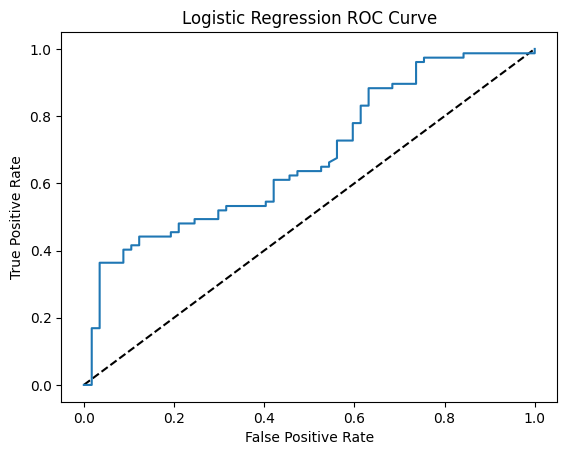

In [9]:
# plotting the ROC Curve of the trained model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

In [10]:
# evaluating model's predictions using ROC AUC
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f'ROC AUC: %{auc_score:.2f}')

ROC AUC: %0.68
